# Heart Attack Analysis and Prediction

## About Dataset

This dataset contains medical data of different patients having various health inicators using which we can analyze and predict the risk of heart attacks more accurately.

## Source

This dataset is present in Kaggle in the following link:
> https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## Data Dictionary

The dataset includes the following features:

- **Age**: Age of the patient.
- **Sex**: Sex of the patient
- **cp**: Chest pain type
  - Value 1: Typical angina
  - Value 2: Atypical angina
  - Value 3: Non-anginal pain
  - Value 4: Asymptomatic
- **trtbps**: Resting blood pressure (in mm Hg)
- **chol**: Cholesterol in mg/dl fetched via BMI sensor
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **rest_ecg**: Resting electrocardiographic results
  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh**: Maximum heart rate achieved
- **exng**: Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak**: Numeric Data. This represents ST depression induced by exercise relative to rest for the patients.
- **slp**: This represents the slope of the peak exercise ST segment for the patients. Values are 0,1 and 2.
- **caa**: Number of major vessels (0-3)
- **thal**: Categorical Data. The thalassemia level in blood of patients. Values are 0, 1, 2 and 3.
- **output**: Heart attack risk indicator (0 = less chance of heart attack, 1 = more chance of heart attack)

## Problem Statements

1. **Exploratory Data Analysis(EDA)**: The objective of exploratory data analysis(EDA) is to anlyze the data and uncover patterns and relationships among the data that can influence the prediction of risk of heart attack.
2. **Preprocessing and Cleaning**: Clean the data handling or removing missing values, outliers, duplicate rows and unnecessary features.

### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.ensemble  import IsolationForest
import ppscore as pps

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")
# Seaborn plot style
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "heart.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

### Exploratory Data Analysis(EDA)

In [4]:
# Show 1st 5 rows to get an idea about the data stored in each feature
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")


DATA DESCRIPTION
Number of observations: 303
Number of features: 14


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
# Get numerical and categorical features
num_cols = [col for col in df.columns if df[col].nunique() > 10]
cat_cols = [col for col in df.columns if df[col].nunique() <= 10]

# Print numerical and categorical features
print(f"Number of Numerical features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of Categorical features: {len(cat_cols)}")
print(cat_cols)

FEATURE DESCRIPTION
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
------------------------------------------------------------
Number of Numerical features: 5
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
------------------------------------------------------------
Number of Categorical features: 9
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [7]:
# Detect Duplicate Rows
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 1


In [8]:
# Misssing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing or null value present in any feature.")

MISSING VALUE DETECTION
No missing or null value present in any feature.


### Numerical Features Analysis

In [9]:
# Statistical Summary of Numerical features
# This will give us a rough idea about distribution of each feature.
print("=" * 60)
print("STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("=" * 60)
for col in num_cols:
    print(f"Feature: {col}")
    print(f"Mean: {df[col].mean(): .2f}")
    print(f"Median: {df[col].median(): .2f}")
    print(f"Standard Deviation: {df[col].std(): .2f}")
    print(f"Range: {df[col].min()} - {df[col].max()}")
    print("-" * 60)

STATISTICAL SUMMARY OF NUMERICAL FEATURES
Feature: age
Mean:  54.37
Median:  55.00
Standard Deviation:  9.08
Range: 29 - 77
------------------------------------------------------------
Feature: trtbps
Mean:  131.62
Median:  130.00
Standard Deviation:  17.54
Range: 94 - 200
------------------------------------------------------------
Feature: chol
Mean:  246.26
Median:  240.00
Standard Deviation:  51.83
Range: 126 - 564
------------------------------------------------------------
Feature: thalachh
Mean:  149.65
Median:  153.00
Standard Deviation:  22.91
Range: 71 - 202
------------------------------------------------------------
Feature: oldpeak
Mean:  1.04
Median:  0.80
Standard Deviation:  1.16
Range: 0.0 - 6.2
------------------------------------------------------------


(0.0, 1.0, 0.0, 1.0)

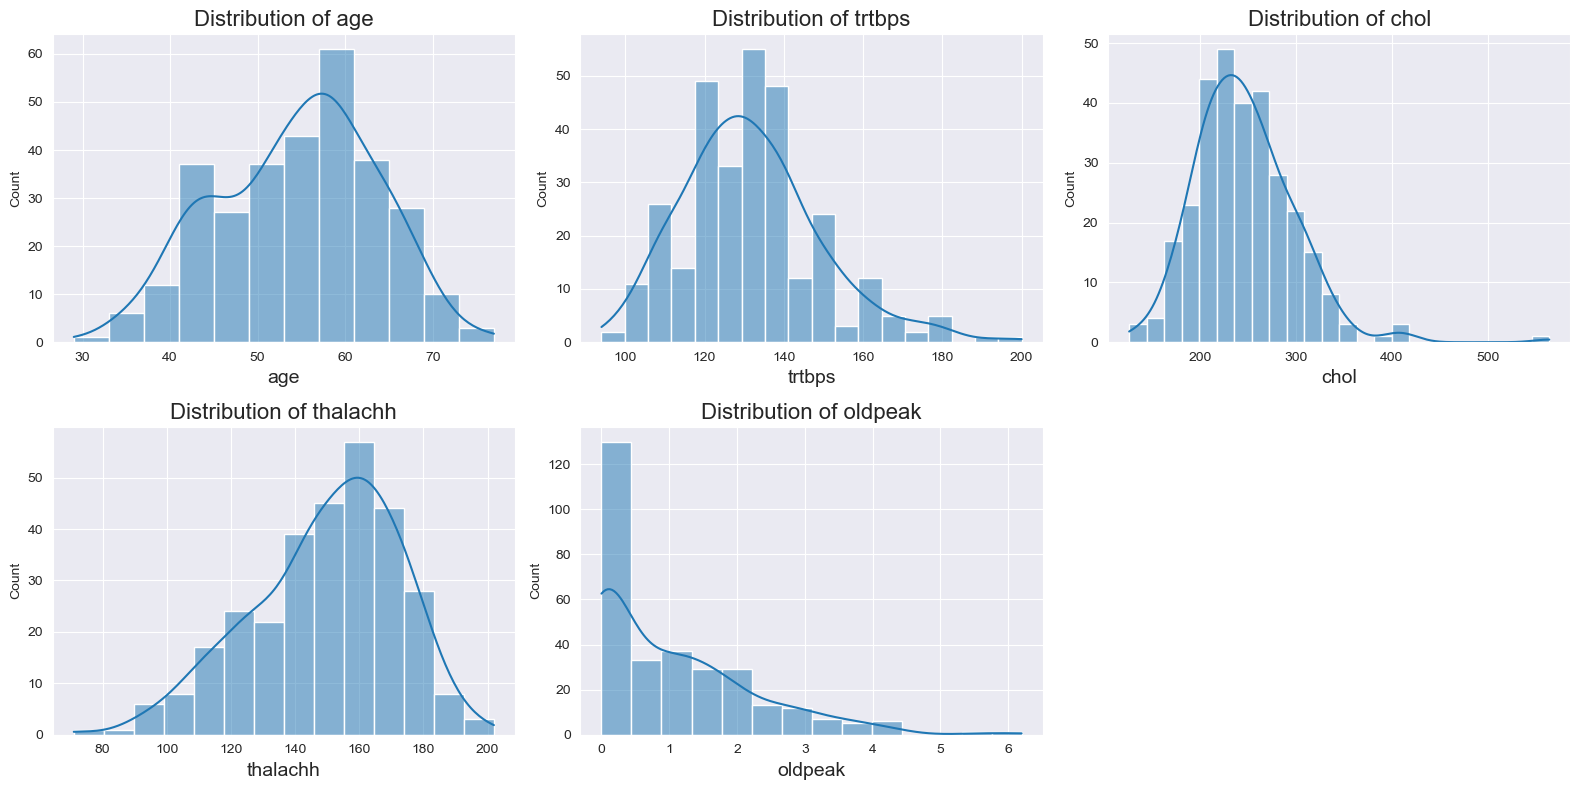

In [10]:
# Visualize the distribution of numerical features using Histogram
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize=(16,8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data= df, x= col, kde= True, ax = axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize= 16)
    axes[i].set_xlabel(f"{col}", fontsize= 14)
plt.tight_layout()
axes[-1].axis("off")

### Key Findings

#### Statistical Summary and Histogram Analysis

- Most of the observations have a **age** range **50yrs to 70 yrs**.
- Blood Pressure(**trtbps**) is almost normally distributed but right skewed over **160 mm/Hg**. BP of most of the observations have **above 120 mm/Hg and below 140 mm/Hg**.
- Chelestoral(**chol**) is normally distributed but slightly right skewed above **350**. This is might be due to presence of some outliers.
- Maximum heart rate achieved(**thalachh**) is skewd at left. Most of the observations have max. heart rate above **140**.
- **oldpeak** of most of the observations is **0**.

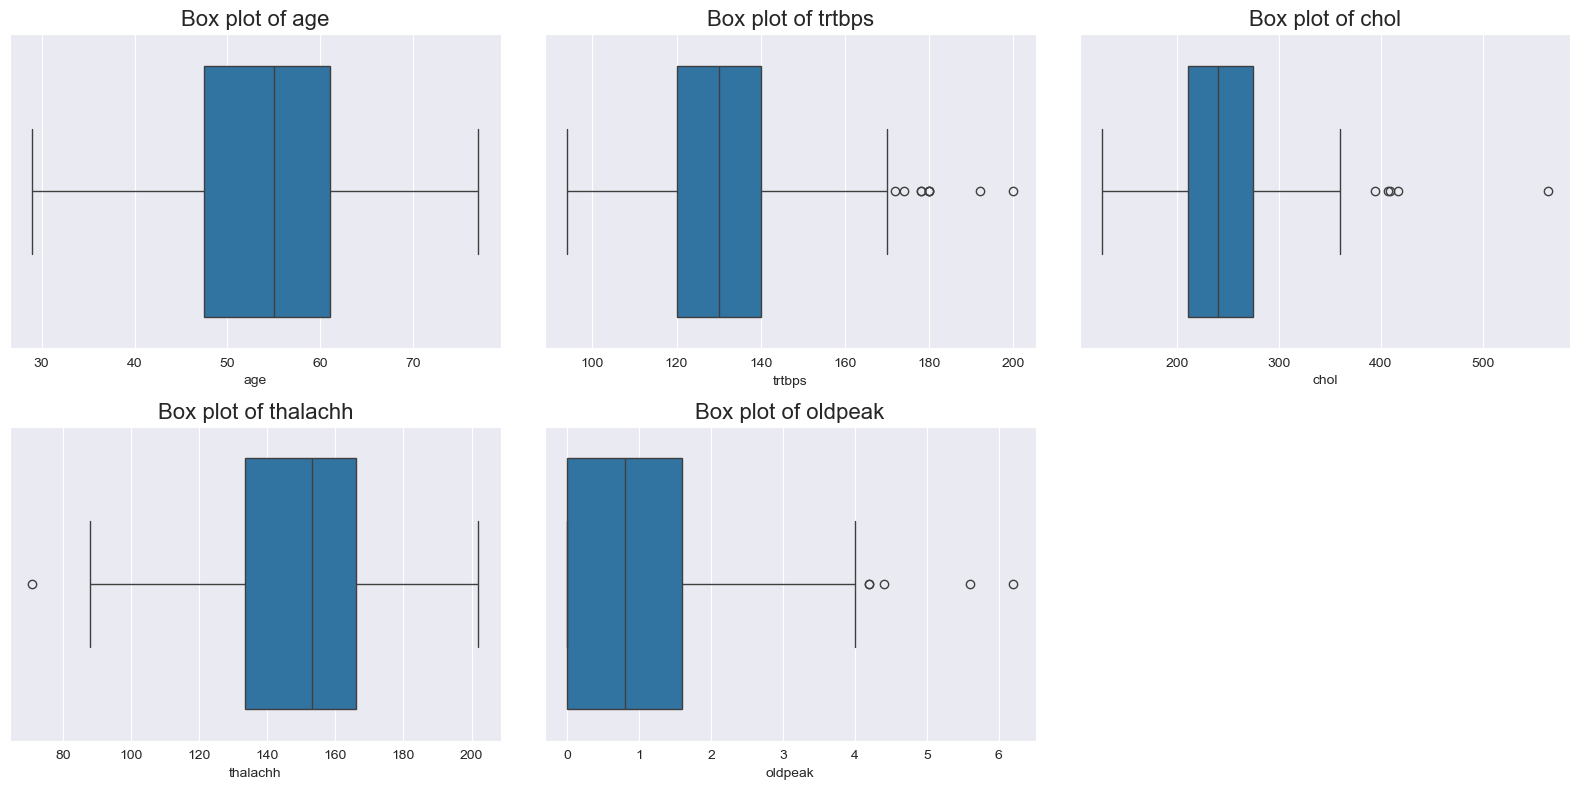

In [11]:
# Outlier detection of each numerical feature using Box Plot
fig, axes = plt.subplots(nrows = 2, ncols= 3, figsize= (16,8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f"Box plot of {col}", fontsize= 16)
plt.tight_layout()
axes[-1].axis("off")
plt.show()

In [12]:
# Detect presence of outlier rows in the dataset using Isolation Forest
iso = IsolationForest(contamination = 0.1, random_state= 42)
iso.fit(df[num_cols])

IsolationForest(contamination=0.1, random_state=42)

In [13]:
df_o = df.copy()
df_o["Outlier"] = iso.predict(df[num_cols])
outliers = df_o[df_o["Outlier"]== -1]
print("=" * 60)
print("OUTLIER DETECTION BY ISOLATION FOREST")
print("=" * 60)
print(f"Number of outlier rows: {outliers.shape[0]}")

OUTLIER DETECTION BY ISOLATION FOREST
Number of outlier rows: 31


### Key Findings

#### Outlier Detection

- From Box Plot analysis it is found that blood pressure(trtbps), cholestoral(chol) and oldpeak have outliers above upper extreme.
- From Isolation Forest analysis it is found that **31** observations are outliers.

### Target Analysis(Understanding of heart Attack Rate)

Analyze the rate of heart attack.

HEART ATTACK RATE ANALYSIS
output
1    165
0    138
Name: count, dtype: int64


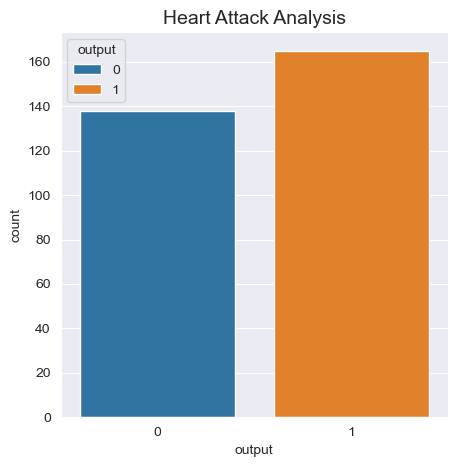

In [14]:
# Count Heart Attack Rate
print("=" * 60)
print("HEART ATTACK RATE ANALYSIS")
print("=" * 60)
heart_attacks = df["output"].value_counts()
print(heart_attacks)

# Visualize the Rate of heart Attack
plt.figure(figsize=(5, 5))
sns.countplot(data= df, x= "output", hue="output")
plt.title("Heart Attack Analysis", fontsize=14)
plt.show()

### Key Findings

- Number of patients having chances of heart attack is slightly more in this dataset.
- This dataset is almost **balanced**.

### Gender Analysis (Impact of Gender in Chances of Heart Attack)

Analyze the chances of heart attack in males and females.

GENDER ANALYSIS
   sex    output
0    0  0.750000
1    1  0.449275


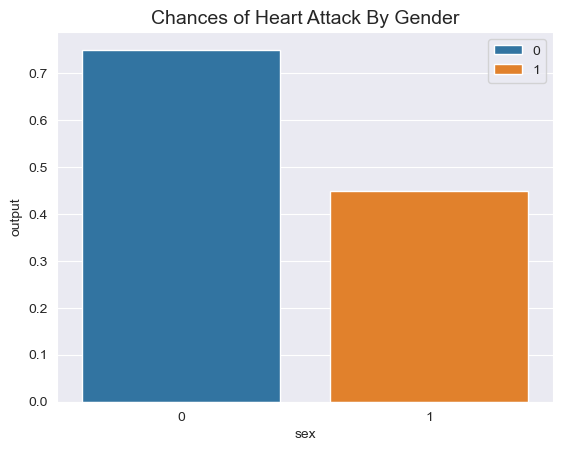

In [15]:
# Calculate the chances of heart attack by gender
ha_gender = df.groupby("sex")["output"].mean().reset_index()
print("=" * 60)
print("GENDER ANALYSIS")
print("=" * 60)
print(ha_gender)

# Visualize the gender analysis
sns.barplot(data=ha_gender, x = "sex",y= "output" , hue= "sex")
plt.title("Chances of Heart Attack By Gender", fontsize= 14)
plt.legend()
plt.show()

### Key Findings

- Chances of heart attack is more in male compared to female.

### Cheast Pain Analysis(Impact of Cheast Pain(cp) on Chances of Heart Attack)

Analyze which type of cheast pain causes more chances of heart attack

CHEAST PAIN TYPE ANALYSIS
   cp    output
0   0  0.272727
1   1  0.820000
2   2  0.793103
3   3  0.695652


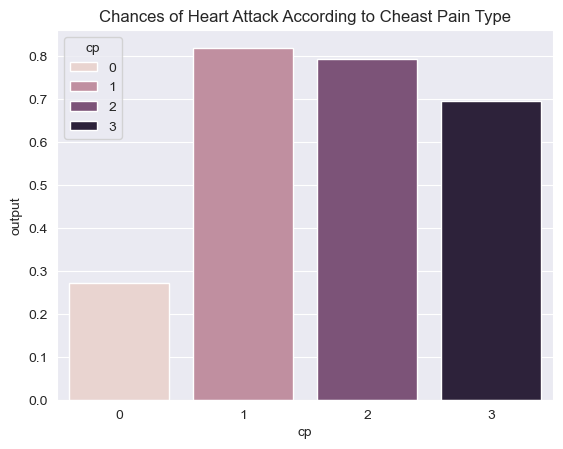

In [16]:
# Calculate the chances of heart attack by cheast pain type
ha_cp = df.groupby("cp")["output"].mean().reset_index()
print("=" * 60)
print("CHEAST PAIN TYPE ANALYSIS")
print("=" * 60)
print(ha_cp)

# Visualize the cheast pain type analysis
sns.barplot(data= ha_cp, x= "cp", y= "output", hue= "cp")
plt.title("Chances of Heart Attack According to Cheast Pain Type")
plt.show()

### Key Findings

- Chances of heart attack is more for atypical angina(1), non-anginal pain(2) and asymtomatic pain(3) except Typical angina(0).

### Fasting Blood Sugar Analysis(Impact of Fasting Blood Sugar(fbs) on Chances of Heart Attack)

Analyze how fasting blood sugar level(1 for >120 and 0 for <=120) affects the chances of heart attack.

FASTING BLOOD SUGAR LEVEL ANALYSIS
   fbs    output
0    0  0.550388
1    1  0.511111


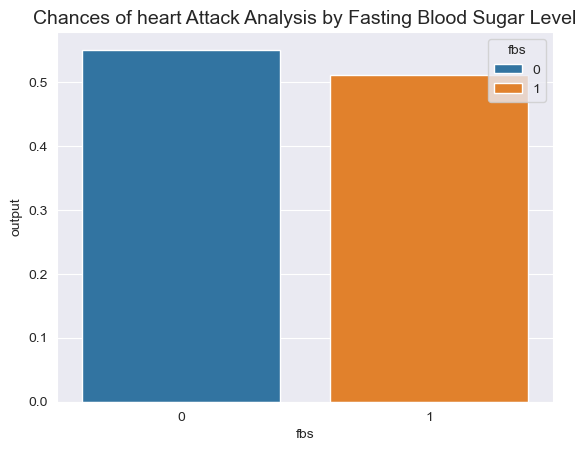

In [17]:
# Calculate chances of heart attack by FBS
ha_fbs = df.groupby("fbs")["output"].mean().reset_index()
print("=" * 60)
print("FASTING BLOOD SUGAR LEVEL ANALYSIS")
print("=" * 60)
print(ha_fbs)

# Visualizing fasting blood sugar level analysis
sns.barplot(data= ha_fbs, x= "fbs", y= "output", hue= "fbs")
plt.title("Chances of heart Attack Analysis by Fasting Blood Sugar Level", fontsize= 14)
plt.show()

### Key Findings

- Only presence of high(> 120mg/dl) fasting blood sugar level not increases the chances of heart attack. Astonishingly, chances of heart attack is found slightly more in those patients who have normal blood sugar level.

### Resting Electrocardiographic Result Analysis(Impact of Result of Resting Electrocardiographic (restecg) on Chances of Heart Attack)

Analyze how the result of Resting electrocardiographic(Rest ECG) affects the chances of Heart Attack.

REST ECG ANALYSIS
   restecg    output
0        0  0.462585
1        1  0.631579
2        2  0.250000


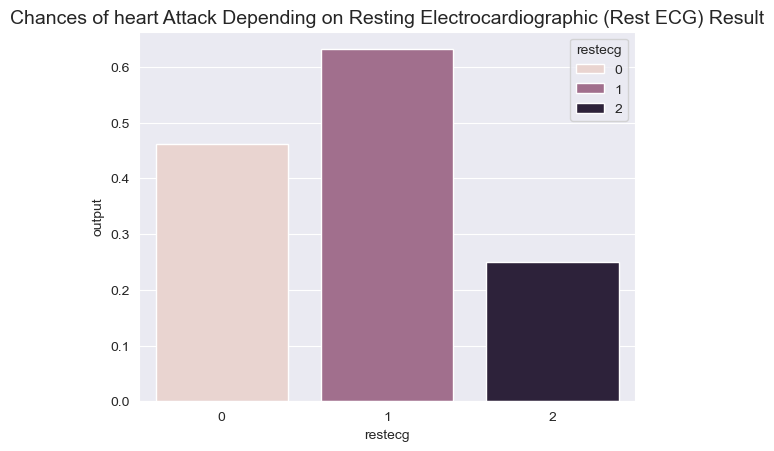

In [18]:
# Calculate chances of heart attack by Resting electrocardiographic
ha_restecg = df.groupby("restecg")["output"].mean().reset_index()
print("=" * 60)
print("REST ECG ANALYSIS")
print("=" * 60)
print(ha_restecg)

# Viisualize Resting Electrocardiographic Analysis
sns.barplot(data= ha_restecg, x= "restecg", y= "output", hue= "restecg")
plt.title("Chances of heart Attack Depending on Resting Electrocardiographic (Rest ECG) Result", fontsize= 14)
plt.show()

### Key Findings

- Patients having Resting Electrocardiographic(ECG) result **ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)** have the most chances of heart attack.
- It also showing that the **46%** patients having **Normal** Resting Electrocardiographic(ECG) result also have chances of heart attack.

So, only abnormality in Resting Electrocardiographic(ECG) result is not increases the chances of heart attack.

### Exercise-induced Angina Analysis(Effect of Exercise-induced Angina on Chances of heart Attack)

Analyze how Exercise-induced Angina(1 for yes and 0 for no) affects the chances of heart attack.

EXERCISE-INDUCED ANGINA ANALYSIS
   exng    output
0     0  0.696078
1     1  0.232323


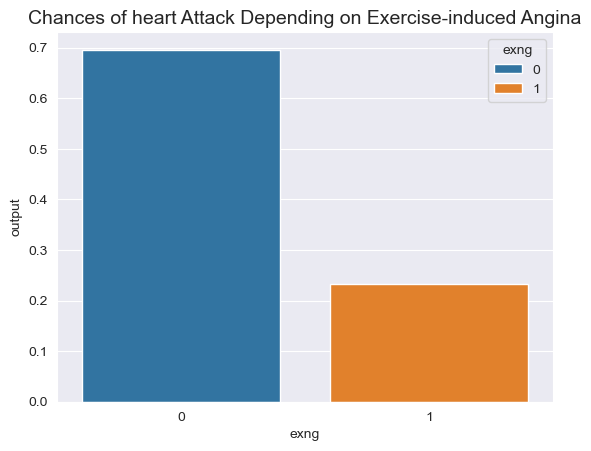

In [19]:
# Calculate chances of heart attack by Excercise-induced Angina
ha_exng = df.groupby("exng")["output"].mean().reset_index()
print("=" * 60)
print("EXERCISE-INDUCED ANGINA ANALYSIS")
print("=" * 60)
print(ha_exng)

# Viisualize Excercise-induced Angina Analysis
sns.barplot(data= ha_exng, x= "exng", y= "output", hue= "exng")
plt.title("Chances of heart Attack Depending on Exercise-induced Angina", fontsize= 14)
plt.show()

### key Findings

- Excercise-induced Angina dost not increases the chances of heart attack as it is shown that **70%** of patients not having angina during their exercise also have chances of heart attack.

### Slope of Peak Exercise ST Segment Analysis(Impact of Slope of the Peak Exercise ST Segment on the Chances of Heart Attack)

Analyze how slope of the peak exercise ST segment affects the chances of heart attack

SLOPE OF PEAK EXERCISE ST SEGMENT ANALYSIS
   slp    output
0    0  0.428571
1    1  0.350000
2    2  0.753521





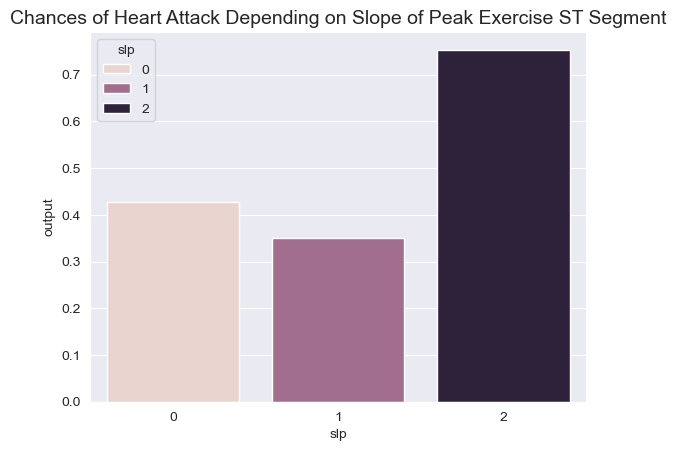

In [20]:
# Calculate chances of heart attack by slp
ha_slp = df.groupby("slp")["output"].mean().reset_index()
print("=" * 60)
print("SLOPE OF PEAK EXERCISE ST SEGMENT ANALYSIS")
print("=" * 60)
print(ha_slp)
print("\n\n")

# Visualize Slope of Peak Exercise ST Segment Analysis
sns.barplot(data= ha_slp, x= "slp", y= "output", hue="slp")
plt.title("Chances of Heart Attack Depending on Slope of Peak Exercise ST Segment", fontsize= 14)
plt.show()

### Key Findings

- Most of the patients having Slope of Peak Exercise ST Segment value **2** have more chances of heart attack.

### Thalassemia Level Analysis(Effect of Thalassemia Level in Blood on the Chances of Heart Attack)

Analyze how thalassemia level in blood affects the chances of heartattack.

THALASSEMIA LEVEL ANALYSIS
   thall    output
0      0  0.500000
1      1  0.333333
2      2  0.783133
3      3  0.239316





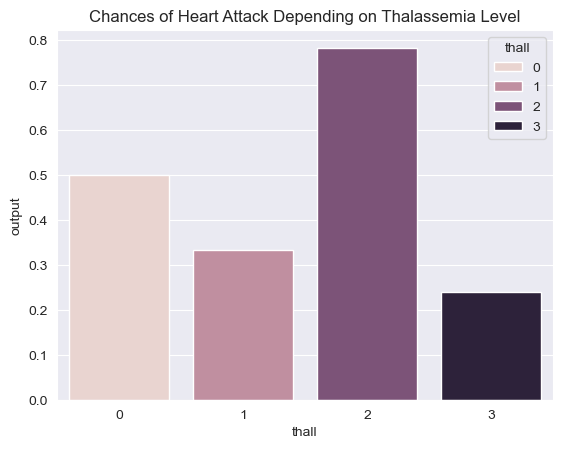

In [21]:
# Calculate the chances of heart attack by thalassemia level in blood
ha_thal = df.groupby("thall")["output"].mean().reset_index()
print("=" * 60)
print("THALASSEMIA LEVEL ANALYSIS")
print("=" * 60)
print(ha_thal)
print("\n\n")

# Visualize the thalassemia Analysis
sns.barplot(data= ha_thal, x= "thall", y= "output", hue= "thall")
plt.title("Chances of Heart Attack Depending on Thalassemia Level")
plt.show()

### Key Findings

- 78% patients having thalassemia level **2** have the chances of heart attack.
- Also having thalassemia level **0** also have chance of heart attack.

This means that thalassemia level is not only reason that increases chances of heart attack.

### Age Analysis(Effect of Age on Heart Attack)

Visualize how age influences the chances of heart attack by looking at the Heart Attack Rate in different age group.

Heart Attack Rate Based on Age


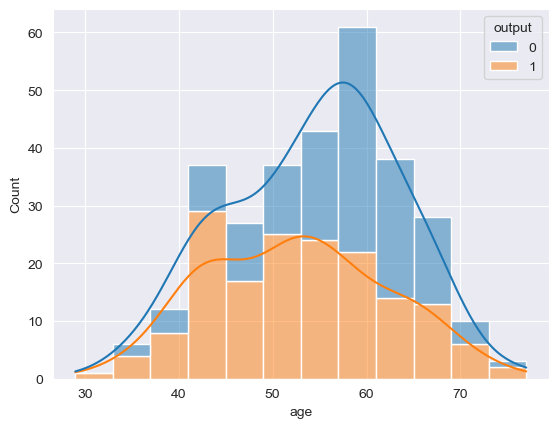

In [22]:
# Heart Attack rate at different age
sns.histplot(data= df, x= "age", hue= "output", kde= True, multiple= "stack")
print("Heart Attack Rate Based on Age")
plt.show()

### Key Findings

- Middle aged patients(Above 40 years to 60 years) have more chances of heart attack depending on other healt factors.

### Blood Preassure Analysis(Impact of Resting Blood Pressure on Chances of Heart Attack)

Visualize how resting blood pressure(BP) influences the chances of heart attack by looking at the heart attack rate on different blood pressure level. 

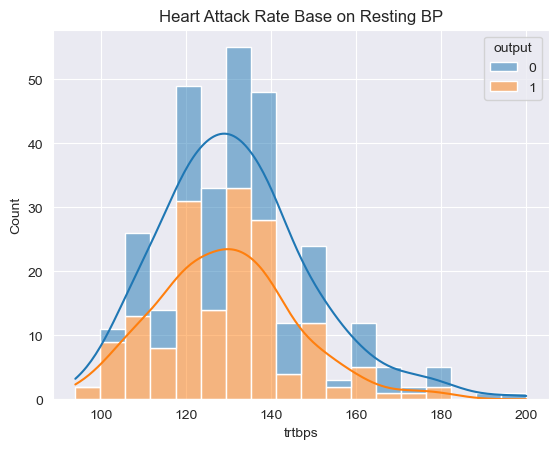

In [23]:
# Heart Attack Rate at Resting blood pressure
sns.histplot(data= df, x= "trtbps", hue= "output", kde= True, multiple= "stack")
plt.title("Heart Attack Rate Base on Resting BP")
plt.show()

### Key Findings

- Chances of heart attack is higher for hypertension patients(having resting blood pressure is more than 120) depending on the other health factors.

### Cholestoral Level Analysis(Effect of cholestoral level on Chances of Heart Attack)

Visualize how level of cholestoral affects the chances of heart attack.

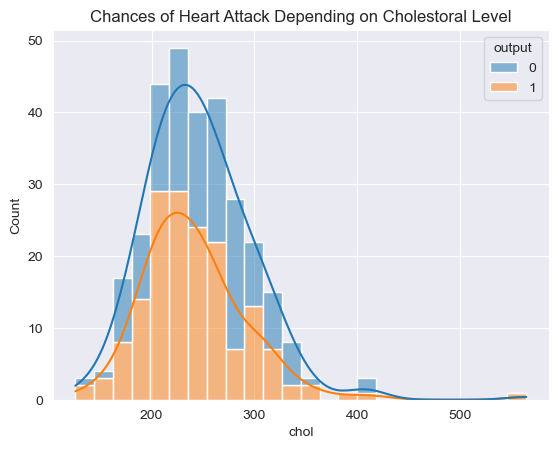

In [24]:
# Heart attack rate by cholestoral level
sns.histplot(data= df, x= "chol", hue= "output", kde= True, multiple= "stack")
plt.title("Chances of Heart Attack Depending on Cholestoral Level")
plt.show()

### Key Findings

- Chances of heart attack increases with high cholestoral level.

### Maximum Heart Rate Analysis(Impact of Maximum Heart Rate on Heart Attack)

Visualize how maximum heart rate acchieved affects the chances of heart attack.

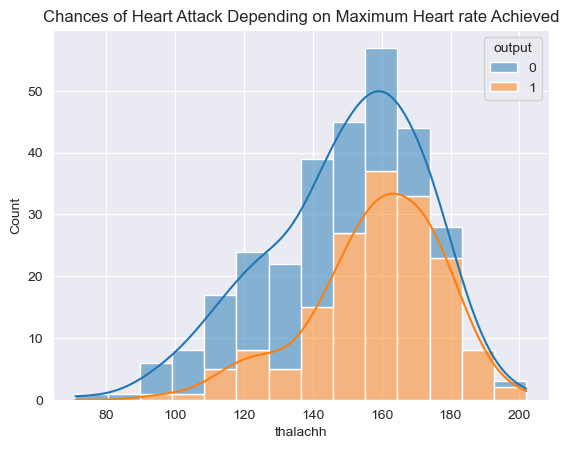

In [25]:
# heart attack rate by max. heart rate achieved
sns.histplot(data= df, x= "thalachh", hue="output", kde= True, multiple= "stack")
plt.title("Chances of Heart Attack Depending on Maximum Heart rate Achieved")
plt.show()

### Key Findings

- As maximum heart rate achieved by the patients increases over 140 chances of heart attack are very high.

### Analysis of ST Depression Induced By Excercise

Visualize how ST depression induced by excercise affects the chances of heart attack.

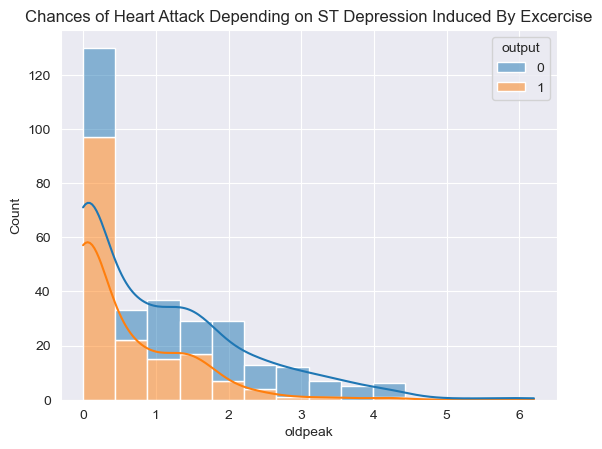

In [26]:
# Heart Attack Rate by ST depression induced by excescise
sns.histplot(data= df, x= "oldpeak", hue= "output", kde= True, multiple= "stack")
plt.title("Chances of Heart Attack Depending on ST Depression Induced By Excercise")
plt.show()

### Key Findings

- Low ST depression induced by excercise increases the chances of heart attack.

### Age-Gender Analysis(Relationship of Age and Gender with Heart Attack)

Analyze the chances of heart attck for male and female in different age group.

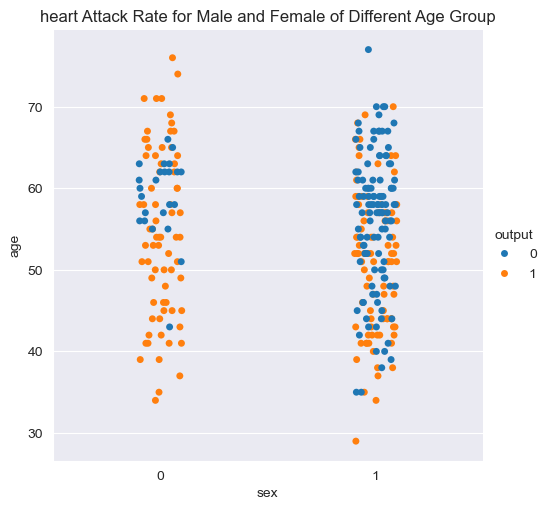

In [29]:
# Create catplot with gender and heart attack colored by age.
sns.catplot(data= df, x= "sex", y= "age", hue= "output", kind= "strip", jitter= True)
plt.title("heart Attack Rate for Male and Female of Different Age Group")
plt.show()

### Key Findings

- Male of above 30 years of age have more chances of heart attack.
- Females of age group 40-60 years have more chances of heart attack.

### Age-Blood Pressure Analysis(Relationship of Age and Blood Pressure with Heart Attack)

Analyze how blood pressure of different age group of patients causes the heart attack.

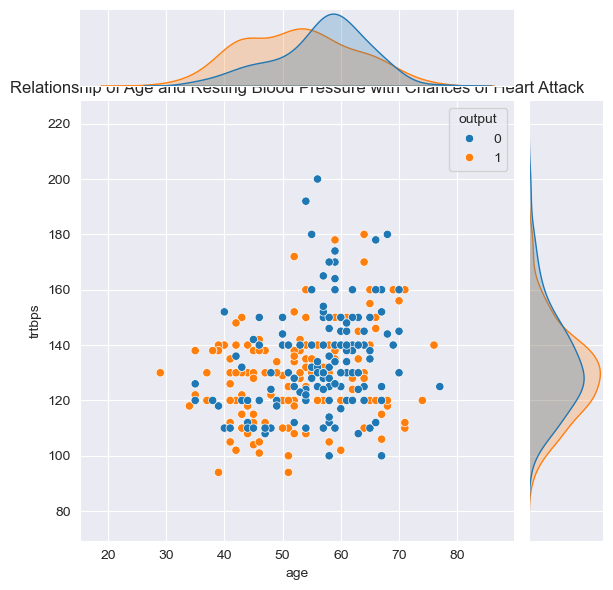

In [35]:
sns.jointplot(x="age", y="trtbps", data=df, hue="output", kind="scatter")
plt.title("Relationship of Age and Resting Blood Pressure with Chances of Heart Attack")
plt.show()

### Key Findings

- High Blood Pressure(resting BP) at any age increases the chances of heart attack.

### Age-Cholestoral Analysis(Relationship of age and cholestoral with chances of heart attack)

Analyze different cholestoral level at different age group causes heart attack.

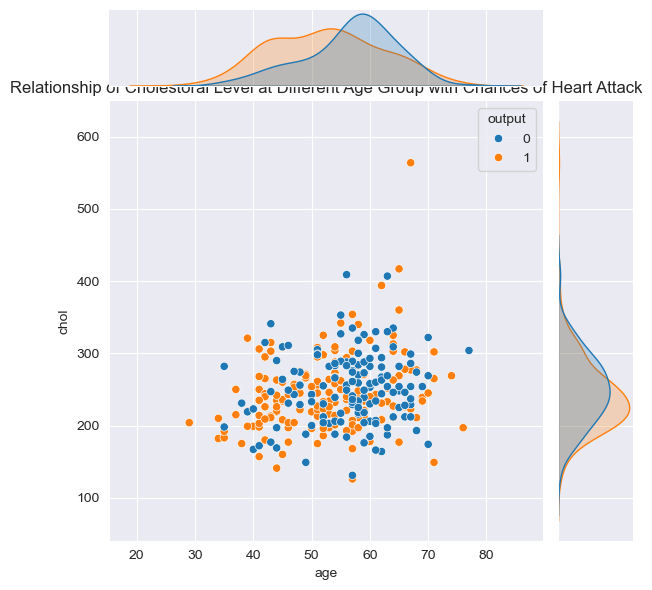

In [36]:
# Visualize Heart attack rate by age and cholestoral
sns.jointplot(data= df, x= "age", y="chol", hue="output", kind="scatter")
plt.title("Relationship of Cholestoral Level at Different Age Group with Chances of Heart Attack")
plt.show()

### Key Findings

- High cholestoral at different age group(specially 40 to 60 years) have more chances of heart attack.

### Correlation Analysis

In [37]:
# Find linear correlation among the numerical features and output using Pearson's correlation co-efficient.

# Add outout to the numerical column list
corr_cols = num_cols + list(["output"])
corr = df[corr_cols].corr().round(2)
corr

,age,trtbps,chol,thalachh,oldpeak,output
age,1.00,0.28,0.21,-0.40,0.21,-0.23
trtbps,0.28,1.00,0.12,-0.05,0.19,-0.14
chol,0.21,0.12,1.00,-0.01,0.05,-0.09
thalachh,-0.40,-0.05,-0.01,1.00,-0.34,0.42
oldpeak,0.21,0.19,0.05,-0.34,1.00,-0.43
output,-0.23,-0.14,-0.09,0.42,-0.43,1.00


In [38]:
# Find Predictive Power Score for numerical features to find nonlinear correlation among the numeric features and output
pps_matrix = pps.matrix(df[corr_cols])
pps_matrix[(pps_matrix["x"] != pps_matrix["y"]) & (pps_matrix["ppscore"] > 0.2)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model


### Key Findings

#### Correlation Analyiss

- From Pearson's correlation it is found that oldpeak has **modarate positive** correlation with output.
- From Pearson's correlation it is found that thalachh has **modarate negetive** correlation with output.

### Data Cleaning

In [39]:
# Delete duplicate row
df_o = df_o.drop_duplicates()

In [40]:
# Remove outlier rows
df_wo = df_o[df_o["Outlier"] == 1]
df_wo.drop("Outlier", axis= 1, inplace= True)
df_wo.shape

(271, 14)

In [41]:
# Save the data after cleaning
file_path = os.path.join(data_path, "heart_wo.csv")
df_wo.to_csv(file_path, index= False)